# Chapter 7 - Moving Beyond Linearity

#### Student ID:

#### Name:

### Q1: This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

<Axes: xlabel='dis', ylabel='nox'>

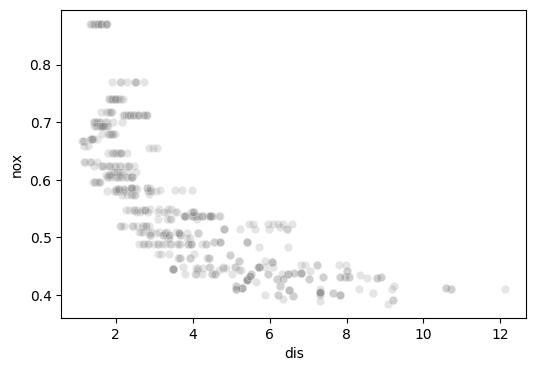

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Boston = pd.read_csv('https://github.com/intro-stat-learning/ISLP/blob/main/ISLP/data/Boston.csv?raw=true')
dis = Boston.pop('dis')
nox = Boston.pop('nox')

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax)

(a) Plot the polynomial fits using the `sns.regplot` function (set `ax=ax` and `scatter=False`) with polynomial degrees (`order=n`) from 1 to 9.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9, 9))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax)
        # __________plot__________
        ax.set(title = 'Degree = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)

(b) Report the associated residual sum of squares using the `sm.OLS` and the `PolynomialFeatures` function.

In [ ]:
scores = []
for n in range(1, 9+1):
  # _____________calculate_rss_____
  rss = # _____calculate_rss_____
  print('Degree', n, ':', rss)
  scores.append(rss)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=range(1, 9+1), y=scores, ax=ax, marker="o")
min_score_index = np.argmin(scores)+1
plt.plot(min_score_index, min(scores), marker = 'o', markersize = 8, color = 'r')
ax.text(min_score_index-1.2, min(scores)+0.1, round(min(scores), 6), size=12)
plt.xlabel('Degree')
plt.ylabel('Residual Sum of Squares')

(c) Perform cross-validation the `cross_val_score` function (set `cv = 10`) to select the optimal degree for the polynomial.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

scores = []
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1, 9+1):
  # _____________calculate_mse_____
  mse = # _______________mse_____
  scores.append(mse)

sns.lineplot(x=range(1, 9+1), y=scores, ax=ax, marker="o")
min_score_index = np.argmin(scores)+1
plt.plot(min_score_index, min(scores), marker = 'o', markersize = 8, color = 'r')
ax.text(min_score_index-1.2, min(scores)+0.1, round(min(scores), 6), size=12)
plt.xlabel('Degree')
plt.ylabel('10-CV mean squared error')
plt.show()

(d) Describe what you observed from (b) and (c). 勿超過一行。

> Ans:  


這題的旨意是在讓大家觀察在讓大家觀察加入次方項會對信賴區間造成的影響，和發現 (d) 的結論。(d) 的結論是可以推廣到本週其他的模型，只是那些模型在 python 中較難用，有興趣的同學可以自行透過 Lab 練習。

### Q2: Regression Splines.

A cubic regression spline with one knot at $\xi$ can be obtained using a basis of the form $x$, $x^2$, $x^3$, $(x − \xi)_+^3$, where $(x − \xi)_+^3 = (x − \xi)^3$ if $x > \xi$ and equals 0 otherwise. We will now show that a function of the form
$$f(x)=\beta_0+\beta_1x+\beta_2x^2+\beta_3x^3+\beta_4 (x − \xi)_+^3$$
is indeed a cubic regression spline, regardless of the values of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

(a) Find a cubic polynomial
$$f_1(x)=a_1+b_1x+c_1x^2+d_1x^3$$
such that $f(x)=f_1(x)$ for all $x\leq \xi$. Express $a_1$, $b_1$, $c_1$, $d_1$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$.

> Ans:  

(b) Find a cubic polynomial
$$f_2(x)=a_2+b_2x+c_2x^2+d_2x^3$$
such that $f(x)=f_2(x)$ for all $x> \xi$. Express $a_2$, $b_2$, $c_2$, $d_2$ in terms of $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$. We have now establised that $f(x)$ is a piecewise polynomial.

> Ans:  

(c) Show that $f_1(\xi) = f_2(\xi)$. That is, $f(x)$ is continuous at $\xi$.

> Ans:  


(d) Show that $f'_1(\xi) = f'_2(\xi)$. That is, $f'(x)$ is continuous at $\xi$.

> Ans:  


(e) Show that $f''_1(\xi) = f''_2(\xi)$. That is, $f''(x)$ is continuous at $\xi$.

> Ans:  


這題在說明的是 regression spline 是怎麼處理連續性的問題。不懂的同學可以看投影片 17 頁的圖：
* (c) 是在描述為何 cubic spline 至少像右上的圖而非像左上的圖是斷開的。
* (d) 是在描述為何 cubic spline 至少像左下的圖而非像右上的圖是有點很不平滑的。
* (e) 是在描述為何 cubic spline 至少像右下的圖而非像左下的圖。


### Q3: Smoothing function.

Suppose that a curve $\hat{g}$ is computed to smoothly fit a set of n points
using the following formula:
$$\hat{g}=\text{arg min}_g\left(\sum_{i=1}^n (y_i-g(x_i))^2+\lambda \int \left[g^{(m)}(x)\right]^2\ dx\right),$$
where $g^{(m)}$ represents the $m$th derivative of $g$ (and $g^{(0)} = g$). Provide example sketches of $\hat{g}$ in each of the following scenarios.

(Following blocks give out an univariate example for $x$ and $y$. It will be easier to answer the following question if consider the function $g$ to be a polynomial function, and the polynomial function can be implement by `np.polyval` and `np.polyfit`. 也就是說，這題有點抽象。如果不附上實際資料，就算回答出這題也不知道題幹再問啥觀念。所以這題附上點和底下的那些畫圖的 block 來讓大家比較好知道這題在搞啥。)

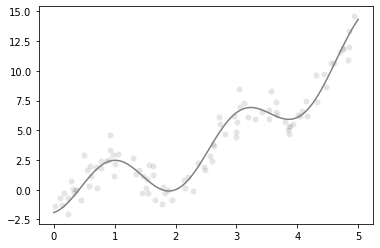

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
line = np.linspace(0,5,100)
X = np.random.uniform(0,5,size=100)
eps = np.random.normal(0,1,100)
g = lambda x: 2*np.sin(3*x+5)+0.5*x**2
Y = g(X)+eps
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')

(example) $\lambda=\infty,\ m =0$

> Ans:  
If we expect $\hat{g}$ to reach minimum under $\lambda=\infty$, $g^0(x)$ would be constrained to 0.  
Therefore, $\hat{g}(x)=0$.

In [ ]:
g_hat = np.zeros_like(line)

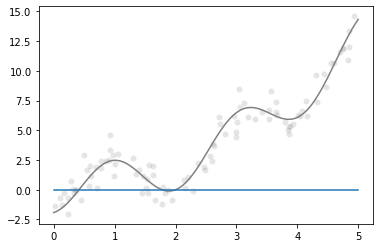

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

---

In [ ]:
# __________You_can_use_whatever_package_you_need__________

(a) $\lambda=\infty,\ m =1$

> Ans:  


In [ ]:
# _________________________________
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(b) $\lambda=\infty,\ m =2$

> Ans:  


In [ ]:
# _________________________________
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(c) $\lambda=\infty,\ m =3$

> Ans:  


In [ ]:
# _________________________________
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(d) $\lambda=0,\ m =3$

> Ans:  


In [ ]:
# _________________________________
g_hat = # _________g_hat_________

In [ ]:
sns.scatterplot(x=X, y=Y,  color='tab:gray', alpha=0.2)
sns.lineplot(x=line, y=g(line), color='gray')
sns.lineplot(x=line, y=g_hat)

(e) Which of the parameter control the flexibility, $\lambda$ or $m$? Which of the parameter control the smoothness, $\lambda$ or $m$?

> Ans:  
control the flexibility:  
control the smoothness:  

### Q4: Local regression.

Use the `sm.nonparametric.lowess` function to fit a locally weighted scatterplot smoothing and predict `nox` using `dis` with fraction (`frac`) from `1/10` to `10/10`. Plot the resulting fits and report the resulting RSS.

In [ ]:
import statsmodels.api as sm

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10,10))
for i, axs in enumerate(axes):
    for j, ax in enumerate(axs):
        n = 1+j+3*i
        # _________________________________
        y_hat = # _________lowess_________
        sns.scatterplot(x=dis, y=nox, color='tab:gray', alpha=0.2, ax=ax,)
        sns.lineplot(x=dis, y=y_hat, color='blue', ax=ax)
        ax.set(title = 'Degree of freedom = ' + str(n))
        ax.axes.set_ylim(0.35,0.9)
        print('Degree of freedom =', n, ':', sum((nox-y_hat)**2))

題目到此

---

